<div style="border:solid black 2px; padding: 20px">
<b>Hello!</b>

My name is Polina Berezhnaia, and I'm gonna review your project on Forecasts and Predictions.
    
I enjoyed checking your project a lot! It is nice you put a lot of effort into this work and did your best to complete everything in a perfect manner. However, there are several issues to consider and improve. 
    
In the notebook, you can find 4 types of my comments:
- <div class="alert alert-danger">
  <h3>Reviewer's comment</h3> It is necessary to make some corrections otherwise the project will not be accepted.
  </div>
    
    
- <div class="alert alert-warning">
  <h3>Reviewer's comment</h3> Such comment is some kind of recommendation on future improvements. It is up to you whether you wanna do any extra work or not.
  </div>
    
    
- <div class="alert alert-success">
  <h3>Reviewer's comment</h3> You will find such comments when everything is done in a perfect way.
  </div>
    
    
- <div style="border:solid black 2px; padding: 20px">
  <h3>Checklist</h3> Such comment can be found in the end of the notebook and depicts adjustments required.
  </div>

Let's work on this project in a form of the dialogue. If you **change or add something**, it would be great to **highlight a change** somehow. Also I would ask you **not to move, change or delete** my comments. All these will help to complete the next review much faster.
    
No worries if you didn't manage to complete some task on the first attempt. The main goal of our team is not to find mistakes, but to share our experience and help you to master your analytical skills 🙂
    
I'm looking forward to seeing your perfect project next time! I'm sure you're gonna be fine!

</div>

<div style="border:solid black 2px; padding: 20px">
<b>Hello there!</b>

Could you please check comments v2 🙂

<div class="alert alert-info">
    
Would be helfpful if you striked out the old comments that have been met.

<div style="border:solid green 2px; padding: 20px">
<b>Hello!</b>
    
You fixed all the issues and did a great job! I appreciate you put a lot of effort into this project! You are a very promising student, thank you for trying to do your best :)
    
I wish you good luck, and hope you will become a professional analyst very soon!
    
P.S. We have to keep all the comments according to our policy.

## Forecasts and Predictions Project

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
One of the most common problems gyms and other services face is customer churn. 
How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. 
However, sometimes it's not obvious that a client has left: they may walk out on tiptoes. 
Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back. In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.

##### You should:
- Learn to predict the probability of churn (for the upcoming month) for each customer
- Draw up typical user portraits: select the most outstanding groups and describe their main features
- Analyze the factors that impact churn most
- Draw basic conclusions and develop recommendations on how to improve customer service:
- Identify target groups
- Suggest measures to cut churn
- Describe any other patterns you see with respect to interaction with customers

### Step 1. Download the data
Model Fitness provided you with CSV files containing data on churn for a given month and information on the month preceding it. The dataset includes the following fields:
- 'Churn' — the fact of churn for the month in question

#### Current dataset fields: User data for the preceding month
- 'gender'
- 'Near_Location' — whether the user lives or works in the neighborhood where the gym is located
- 'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
- Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
- 'Phone' — whether the user provided their phone number
- 'Age'
- 'Lifetime' — the time (in months) since the customer first came to the gym

#### Data from the log of visits and purchases and data on current membership status
- 'Contract_period' — 1 month, 3 months, 6 months, or 1 year
- 'Month_to_end_contract' — the months remaining until the contract expires
- 'Group_visits' — whether the user takes part in group sessions
- 'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime
- 'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month
- 'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

File path: /datasets/gym_churn_us.csv. Download the dataset.

In [1]:
#data preprocessing and upload
#import libraries
import pandas as pd
#import statsmodels
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn_us.csv')

### Step 2. Carry out exploratory data analysis (EDA)
- Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).
- Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).
- Plot bar histograms and feature distributions for those who left (churn) and those who stayed.
- Build a correlation matrix and display it.

In [3]:
#looking at the dataset
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Customer Description**

- 51% male
- 84% live or work close by
- 49% is employee of partner company
- 90% use friend's promo code
- 90% provide phone number
- Average contract length is 4.6 months
- 41% take part in group session
- Average age is 29
- Average total frequency visit per week is 1.9
- Average current month frequency visist per week is 1.8
- Average money spent on gym service is 147
- Average lifetime is 3.7 months
- Average churn rate is 26%


<div class="alert alert-success">
<h3>Reviewer's comment</h3>
    
Well done 👍🏻

It is great you provided an average customer description and analysed some deviations.

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB
None


In [5]:
print(data.shape)

(4000, 14)


In [6]:
data.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

#### No missing values and accurate data types requiring no further work.

<div class="alert alert-success">
<h3>Reviewer's comment</h3>
    
Nice data quality analysis 👍🏻
    
It is also worth checking the data for duplicates.

In [7]:
#mean of data those who left(churn) and those who stayed in months
#In step 2, you need to group the data with respect to the churn indicator.
#In other words, you need to create two groups: the first one will have only those people who left, 
#and the other one will have only those who stayed. Then, for each group, 
#just print the mean values of all features/variables.

mean_feature = data.groupby(['Churn']).mean()
display(mean_feature)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Comparison of Non-Churn(0) vs Churn(1)**

- Non-Churn Customer is more likely to live or work closeby
- tends to be the partner
- use more friend's promo 
- has longer contract by 4 months 
- double group visits time 
- 3 years older as 29 vs 26 of churn group
- spent 43 more on service
- has 4 more months to end conract
- longer lifetime by almost 4 months
- visit gym by 25% more, and 50% more gym visit current month

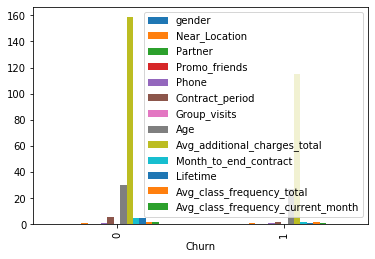

In [8]:
#histogram of those who left vs those who stayed
#mean_feature.hist(bins=20)
mean_feature.groupby('Churn').mean().plot(kind='bar')
plt.show()


In [9]:
mean_feature1 = data.groupby(['Churn']).sum()
display(mean_feature1)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,1499,2566,1570,1039,2656,16891,1364,88101,465671.955802,15527.0,13848,5951.109513,5959.944414
1,542,815,377,195,958,1834,285,28636,122102.955435,1764.0,1051,1564.969337,1108.262875


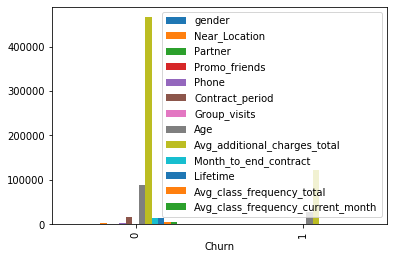

In [10]:
mean_feature1.groupby('Churn').sum().plot(kind='bar')
plt.show()


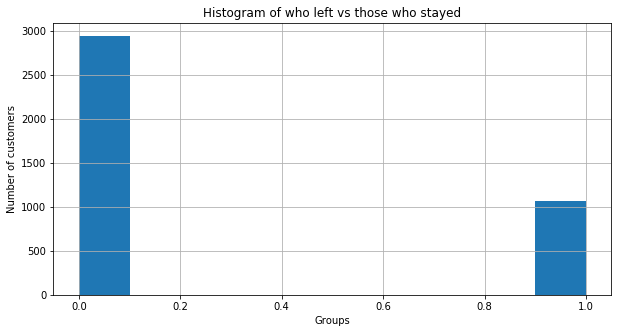

In [11]:
data['Churn'].hist(figsize=(10,5))
plt.title('Histogram of who left vs those who stayed')
plt.xlabel('Groups')
plt.ylabel('Number of customers')
plt.show; 

<div class="alert alert-danger">
<h3>Reviewer's comment</h3>
    
Could you please plot bar histograms and feature distributions for those who left and those who stayed. Currently, the graph depicts only average values.

<div class="alert alert-info">
This should take care of that

try:
    sns.distplot(data)
except RuntimeError as re:
    if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
        sns.distplot(data, kde_kws={'bw': 0.1})
    else:
        raise re

pip uninstall statsmodels

ax = sns.distplot(data, rug=True, hist=False, label='UW', kde_kws={'bw':0.1})

<div class="alert alert-warning">
<h3>Reviewer's comment</h3>
    
Any particular issue you want me to help you with?
    #trying to fix bandwidth issue thats preventing trend line from showing below still not working... 

<div class="alert alert-info">
i tried distplot with #sns.distplot(data[feature],bins=15), but got i keep getting a kde bandwidth error above so im not able to show the trend line, a friend told me i had to update my seaborn. I've tried displot and it wont work and ive read numberous things and tried various different codes but nothing. its pretty much the same thing and it worked for my friend which is weird.. it's not a big deal because I believe I've shown whats needed

<div class="alert alert-warning">
<h3>Reviewer's comment v2</h3>
    
Do you face this problem both in our and your local coding environment? 

<div class="alert alert-info">
i fixed it.. looks like it was just local

<div class="alert alert-success">
<h3>Reviewer's comment v3</h3>
    
Great 👍🏻

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


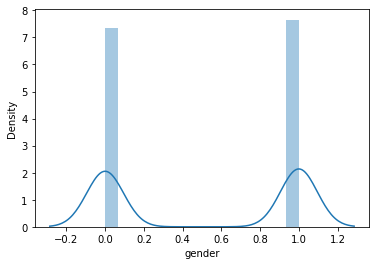

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


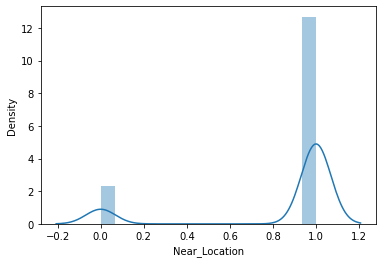

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


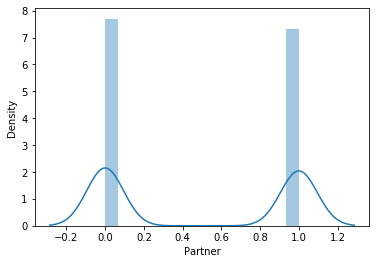

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


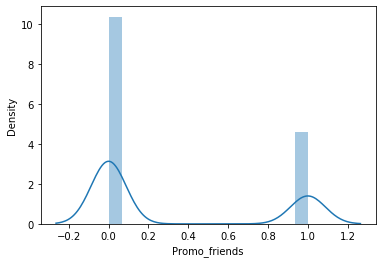

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


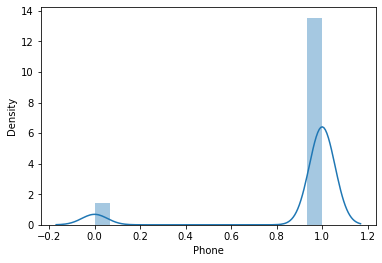

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


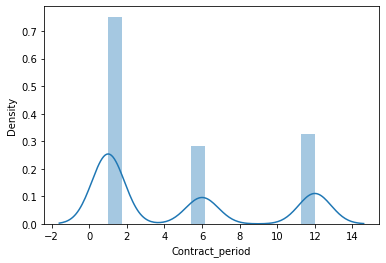

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


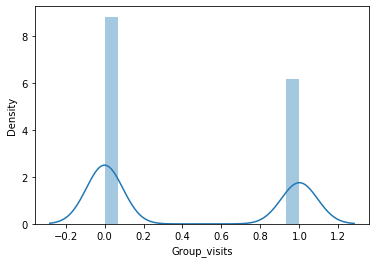

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


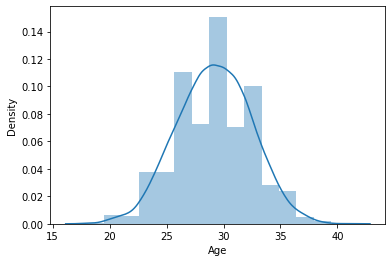

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


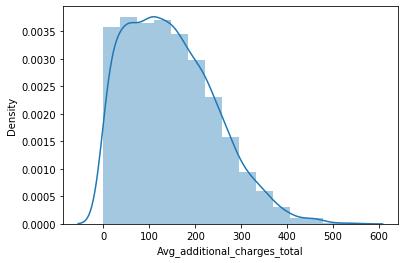

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


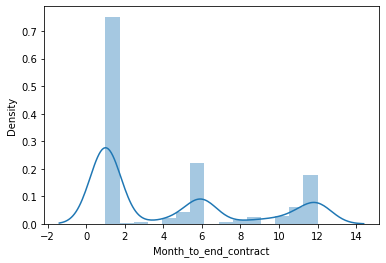

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


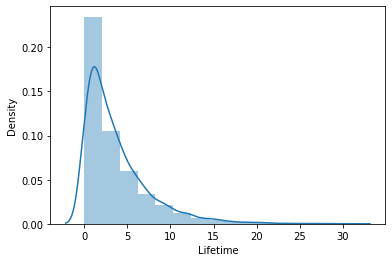

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


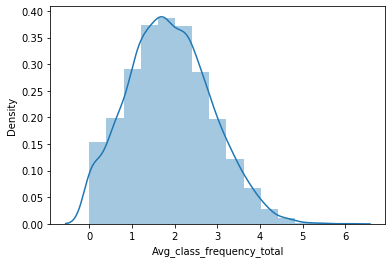

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


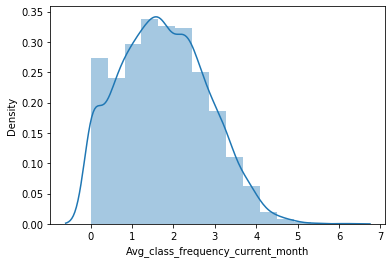

In [12]:
for feature in mean_feature.columns:
    sns.distplot(data[feature],bins=15)
    #kde_kws={"color": "k", "lw": 3, "label": "KDE"},
    #sns.distplot(data[feature],bins=15, kde=False)
    plt.show()
    

**Customer Features Analysis:**
- Similar amount for both genders. 
- A lot more customers live or work near the gym. The gym attracts same number of partner and non-partner. 
- Joing through the friends promotion is twice as much as just joining by yourself. Most customers provide their phone number.
- 1 month contract is more than double of those 6 month and 1 year contracts.
- Group session is 2/3 of non-participating members.
- Most active consumers are aged 25-34.
- Additional charges are mostly within $0-$150.
- Most customers come to gym in 3 months.
- Average weekly visit frequency is 2 and so is the visit per week of the current month.
- The average amount of members leave because of the extra features they pay for. Another reason for leaving is because of age followed by the contract period. 

<div class="alert alert-danger">
<h3>Reviewer's comment v2</h3>
    
Well done! Just one little thing: according to the task, it is necessary to plot and compare the distributions for churn and non-churn customers separately.
    

    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82716d5f90>,
      dtype=object)

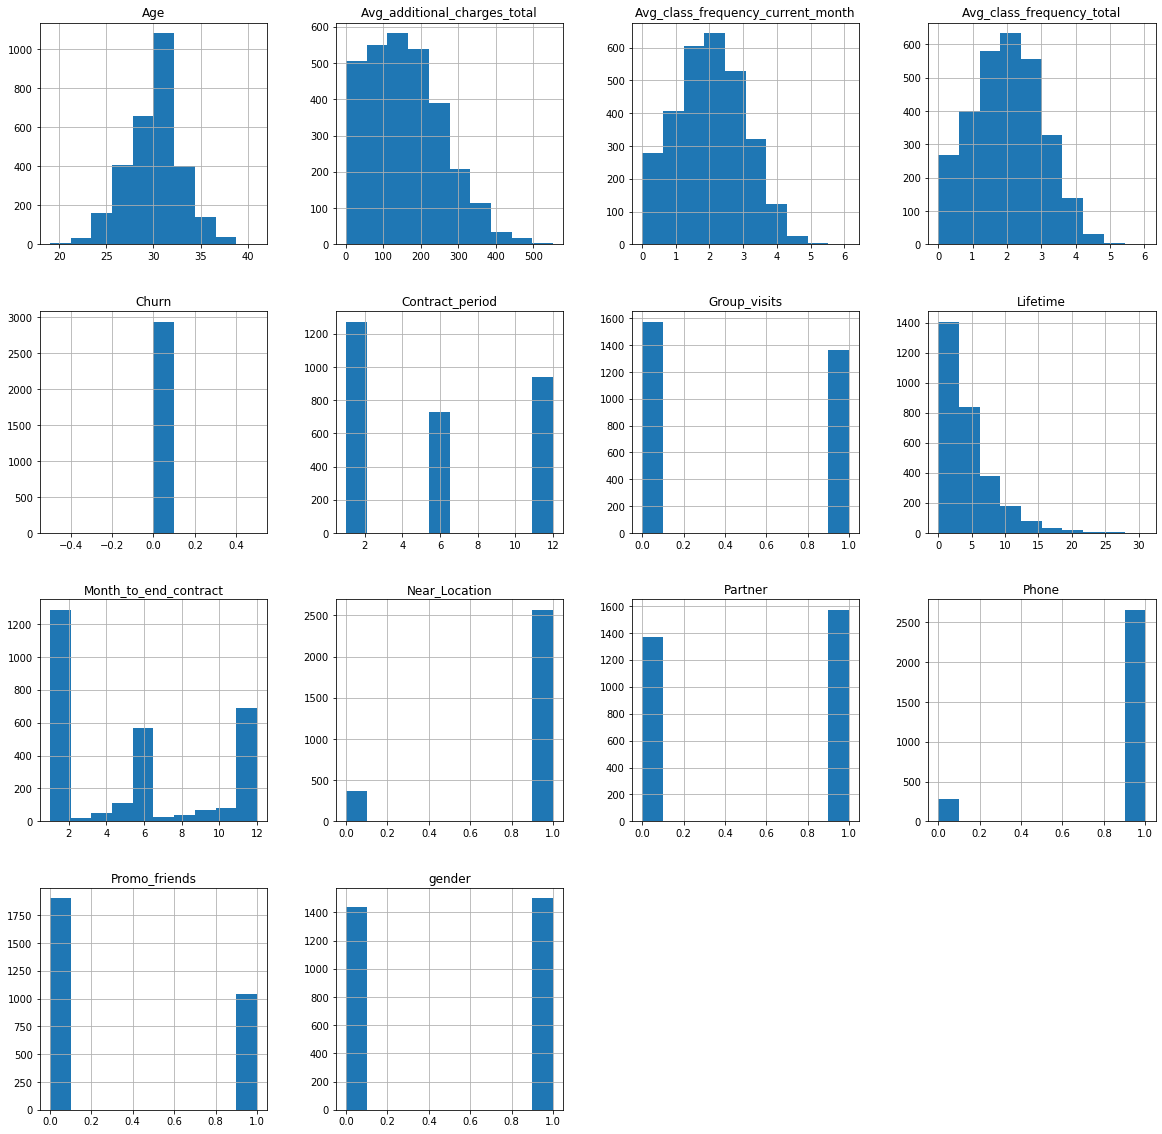

In [13]:
data[data['Churn']==0].hist(figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8270d1ea50>,
      dtype=object)

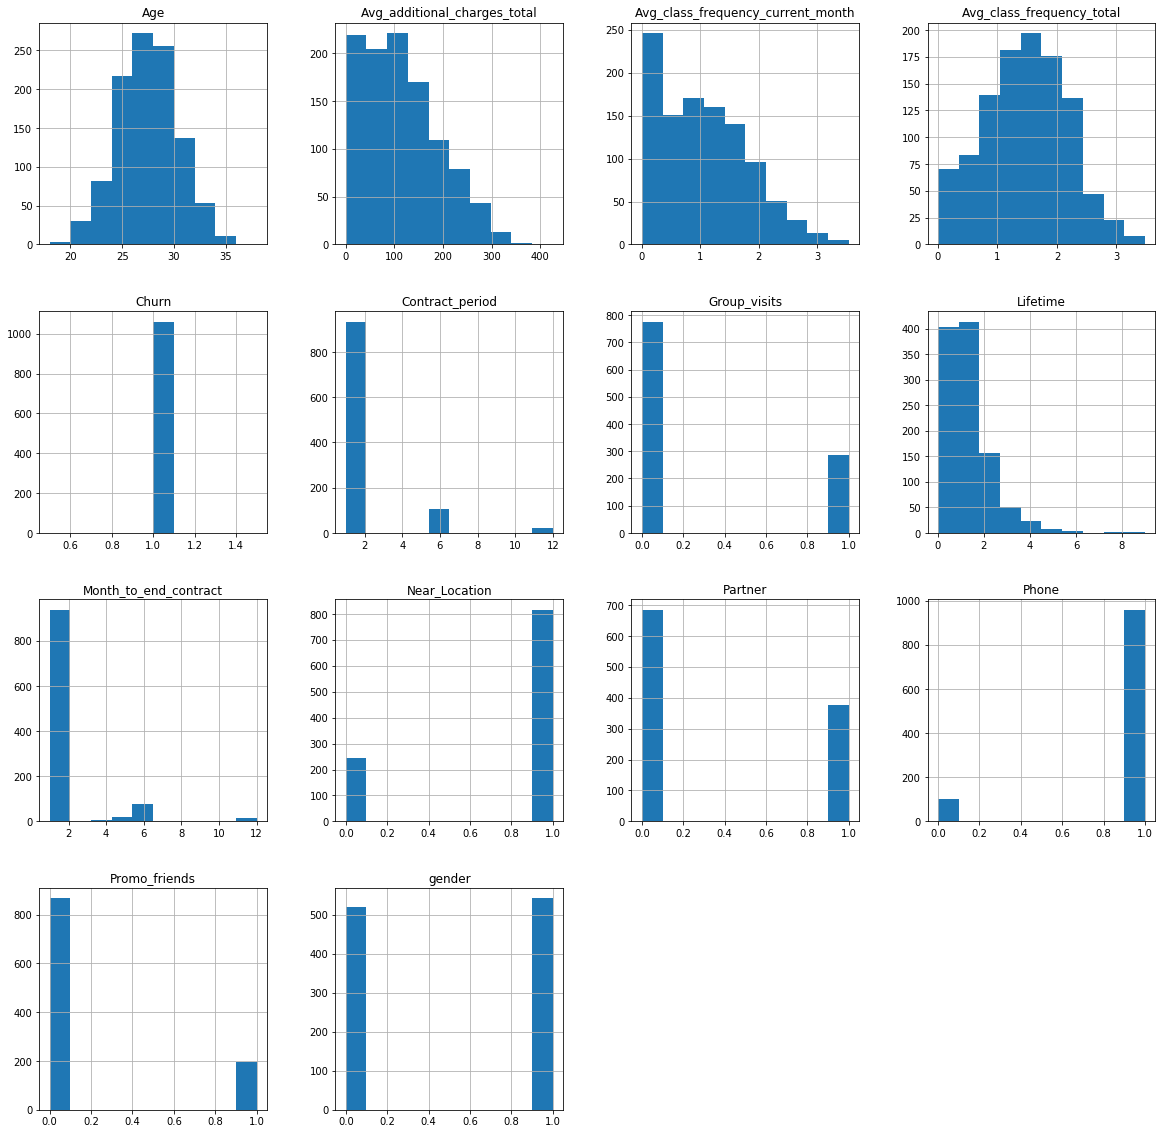

In [14]:
data[data['Churn']==1].hist(figsize=(20,20))


**Customer Features Analysis 2 :**
- AGE: Shows biggest number of customers who leave are over 30. 
- AVG ADDIT. CHARGES- those who leave have more additional charges in total compared to those who stay.
- AVG CLASS FREQ.CURRENT MONTH- those who leave seem to use the gym more in frequency than those who stay in this category and the one below thats probably because some many of them take advantage of their contract until its up. 
- AVG CLASS FREQ TOTAL- shows similar tend as above.
- CONTRACT PERIOD - Most contracts are short for both churn and non-churn, however the churn group has a lot higher quanities of all, where as the non-churn group has suprisingly a lot of members who have really short contracts. The churn group most customers whos contracts are 2 months or almost 12 months.
- GROUP VISITS- similar trend here among non churn and churn groups.
- LIFETIME- lifetime is actually bigger as in more counts and more people the further and longer in months for those in churn group. lots more at the 5 month level than those who don't leave. 
- MO TO END CONTRACT-youll see this is similar to lifetime values as well like above the most in both categories are the ones under 2 months
- NEAR LOCATION- both groups have more people that live near the location
- PARTNER- more partner customers in churn group than non-churn group
- PHONE- similar in both groups
- PROMO FRIENDS- similar in both groups
- GENDER- similar


<div class="alert alert-success">
<h3>Reviewer's comment v3</h3>
    
Cool 👍🏻
    

<div class="alert alert-success">
<h3>Reviewer's comment</h3>
    
👍🏻

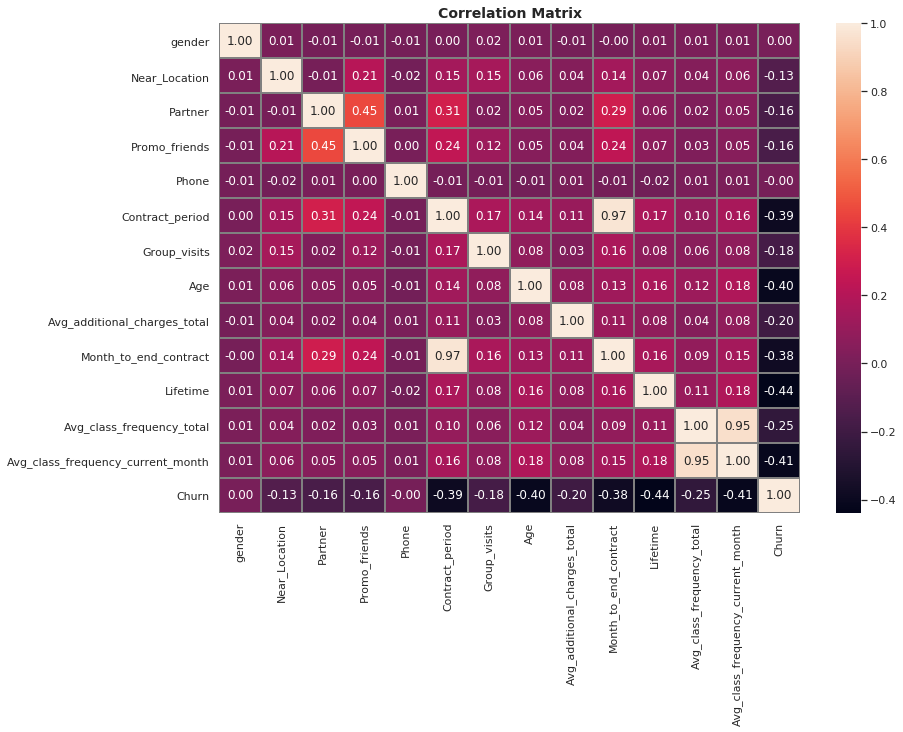

In [15]:
#plot an annotated heatmap for correlation matrix
#build and render correlation matrix
cm = data.corr() #calculate correlation matrix
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Correlation Matrix', fontsize=14, weight='bold')
sns.heatmap(cm, annot = True, fmt='.2f', linewidths='1', linecolor='gray') #correcting "ragged" heatmap fields in the latest version of the library
plt.show()


/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


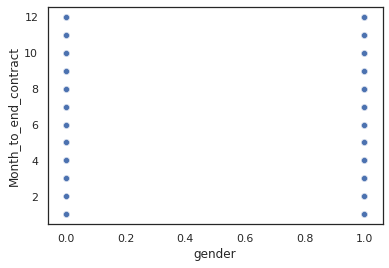

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


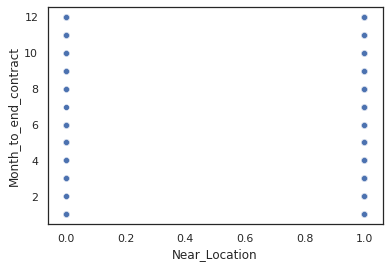

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


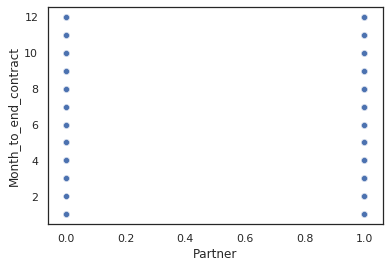

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


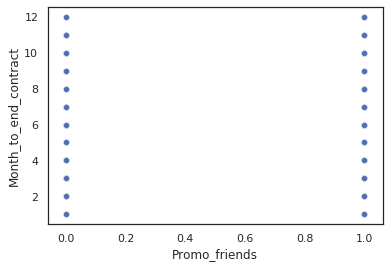

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


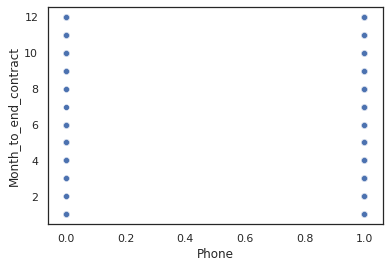

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


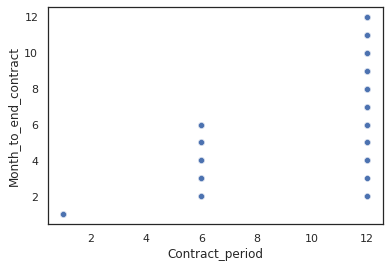

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


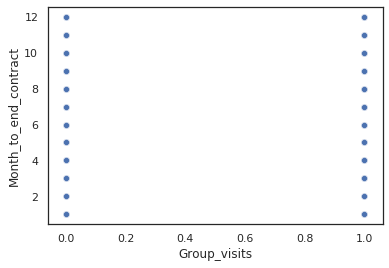

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


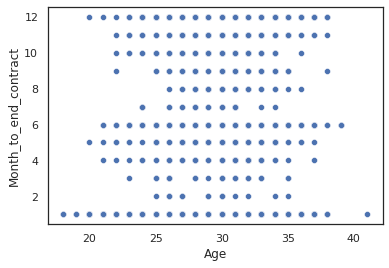

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


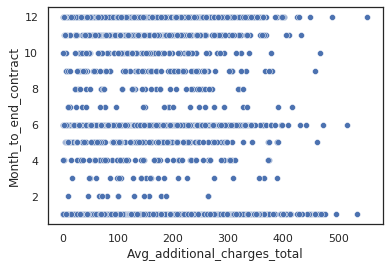

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


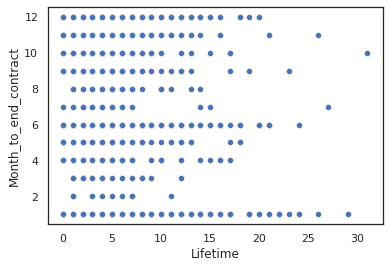

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


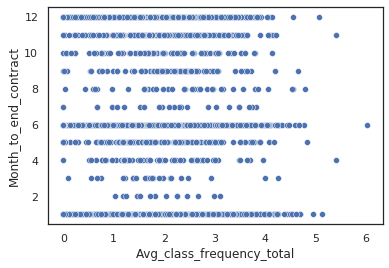

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


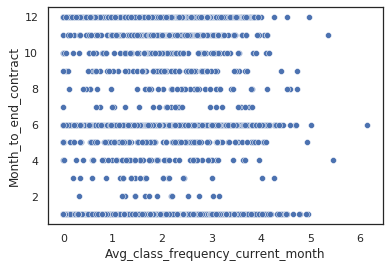

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


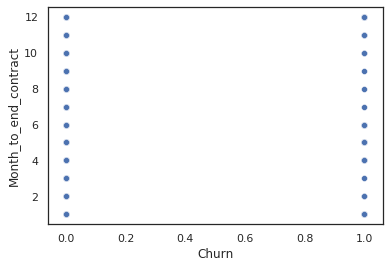

In [16]:
#plot paired distribution feature-target variable diagrams for each feature
for col in data.drop('Month_to_end_contract', axis=1).columns:
    sns.scatterplot(data[col], data['Month_to_end_contract'])
    plt.show()

#### Conclusion
After plotting and reviewing the correlation matrix and scatter charts, we see clear factors that impact churn in the data. Class frequency increases between the first and 3rd months and it's outlier for the 3rd month impacts the mean. We also see age and the offers of additional services also affects the churn rate.

<div class="alert alert-success">
<h3>Reviewer's comment</h3>
    
Great! Additionally, it is worth paying attention that we have two pairs of highly correlated features. One variable from such pair should be removed to avoid its domination over other variables during training stage.

### Step 3. Build a model to predict user churn
- Build a binary classification model for customers where the target feature is the user's leaving next month.
- Divide the data into train and validation sets using the train_test_split() function.

##### Train the model on the train set with two methods:
- logistic regression
- random forest

##### Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?
- Remember to indicate the random_state parameter when dividing data and defining the algorithm.

<div class="alert alert-warning">
<h3>Reviewer's comment</h3>

We can add stratify=y inside train_test_split function, where y is our target variable. As a result, the dataset will be devided into two clusters. The first one will contain all the observations of class 0, while the second one – all the observations of class 1. Then, 20% of observations from each cluster will be combined into test set:
    
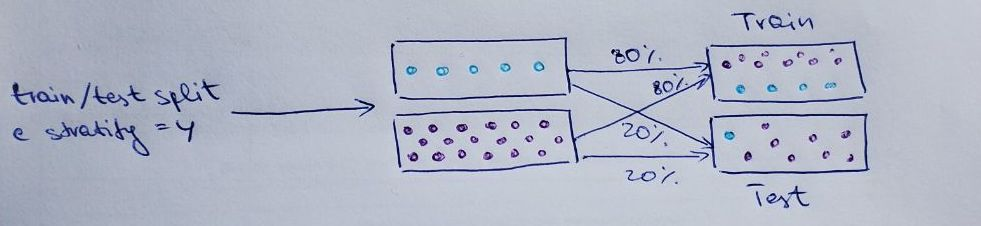
    
This approach helps to split the data into train and test sets in a way that preserves the proportions of observations in each class as observed in the original dataset. It is important as our classes are imbalanced.

In [17]:
#build a binary classification model for customers 
#the target feature is the users leaving next month
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier

#dividing data into train and next
X = data.drop('Churn', axis = 1)
y = data['Churn']

# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

# create a StandardScaler object and apply it to train set
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) # train the scaler and transform the matrix for train set

# apply standardization to the feature matrix for the test set
X_test_st = scaler.transform(X_test)

# declare the list of models
models = [LogisticRegression(), RandomForestClassifier()]

# the function that calculates MAPE
def mape(y_true, y_pred):
    y_error = y_true - y_pred
    y_error_abs = [abs(i) for i in y_error]
    perc_error_abs = y_error_abs / y_true
    return (perc_error_abs.sum() / len(y_true))

# the function that takes the model and data as input and outputs metrics
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('MAE:{:.2f} MSE:{:.2f} MAPE:{:.2f} R2:{:.2f} '.format(mean_absolute_error(y_test, y_pred), 
                                          mean_squared_error(y_test, y_pred),
                                                                    mape(y_test, y_pred),
                                                                    r2_score(y_test, y_pred)))

# write a loop that outputs metrics according to the list of models
for i in models:
    print(i)
    make_prediction(m=i,X_train = X_train_st, y_train= y_train,
                    X_test=X_test_st, y_test = y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
MAE:0.07 MSE:0.07 MAPE:inf R2:0.61 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
MAE:0.09 MSE:0.09 MAPE:inf R2:0.53 


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


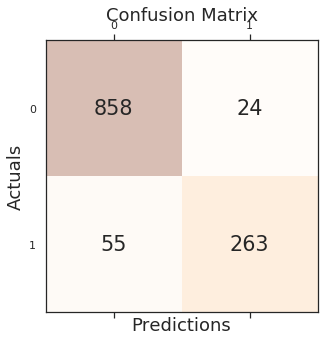

In [18]:
#accuracy, precision, recall and F1 score
from sklearn.model_selection import train_test_split
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
#
# Standardize the data set
#
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Fit the SVC model
#
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)
#
# Get the predictions
#
y_pred = svc.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

#define the model's algorithm 
model = RandomForestClassifier()

#train your model
model.fit(X_train, y_train)

#use the trained model to make forecasts
probabilities = model.predict_proba(X_test)[:,1]

#binary prediction
predictions = model.predict(X_test)

#print the studied metrics for the resulting prediction
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))


Accuracy: 0.91
Precision: 0.88
Recall: 0.77
F1: 0.82


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# define the model's algorithm 
model = LogisticRegression()

# train your model
model.fit(X_train, y_train)

# use the trained model to make forecasts
probabilities = model.predict_proba(X_test)[:,1]

# binary prediction
predictions = model.predict(X_test)

# print the studied metrics for the resulting prediction
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.93
Precision: 0.90
Recall: 0.84
F1: 0.87


<div class="alert alert-warning">
<h3>Reviewer's comment v2</h3>
    
To fix this, set max_iter parameter to some large value.

<div class="alert alert-danger">
<h3>Reviewer's comment</h3>
    
Pay attention that you need to evaluate accuracy, precision, and recall for all models using the validation data, and then, compare them. Could you please use above mentioned metrics for the analysis?
    
    

<div class="alert alert-info">
Shows that the Logistic Regression is better since it has a higher accuracy and all the scores are higher making it more accurate.

plt.bar(['False Negative' , 'True Negative' , 'True Positive' , 'False Positive'],[FN,TN,TP,FP])
plt.show()

#### Conclusion
the random forest model is less sensitive to cases where the model makes large errors for particular observations. MSE in the random forest model performs well for average gym memberships and will provide the most valueable source of data. Comparing the 4 metrics of MAE, MSE, MAPE and R2 give an idea of the real values of the data but R2 can be useful when we compare the models. Given these values these look like near perfect models with the R2 values we see here

We have a high rate of precision and recall which are needed to determine the F1 Score. The scores in general are high and with the precision score being so high it shows that the model is accurate.


<div class="alert alert-success">
<h3>Reviewer's comment v2</h3>
    
The training and evaluation stages are completed correctly. Great job 🔥

### Step 4. Create user clusters
##### Set aside the column with data on churn and identify object (user) clusters:
- Standardize the data.
- Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.
- Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)
- Look at the mean feature values for clusters. Does anything catch your eye?
- Plot distributions of features for the clusters. Do you notice anything?
- Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

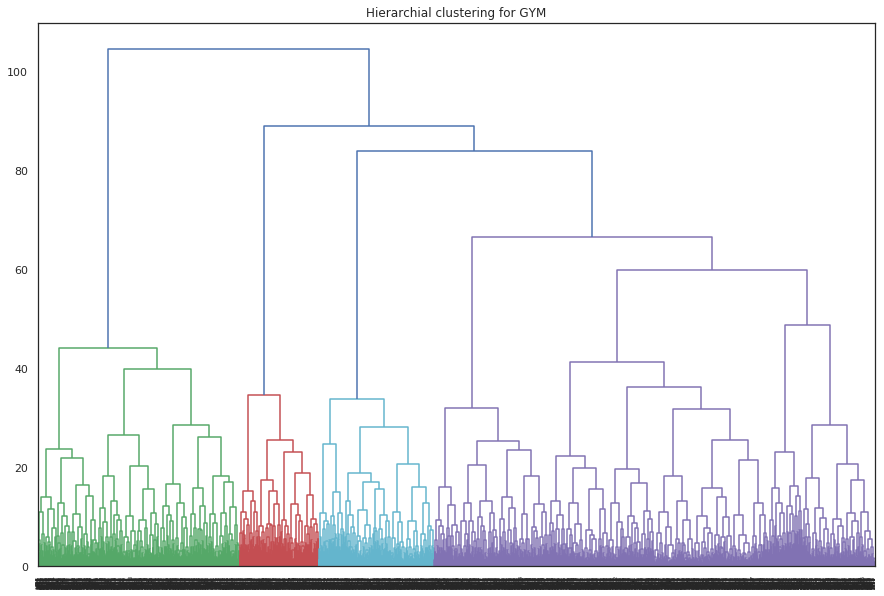

In [21]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# obligatory standardization of data before passing it to the algorithm
sc = StandardScaler()
X_sc = sc.fit_transform(X)

km = KMeans(n_clusters = 5, random_state=0) # setting the number of clusters as 5
labels = km.fit_predict(X_sc)

# plotting a dendrogram
linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()


<div class="alert alert-danger">
<h3>Reviewer's comment</h3>
    
It is necessary to specify random_state for KMeans( ) function. Otherwise, the results will be different every time you re-run the code :)

<div class="alert alert-info">
I've done this :)

<div class="alert alert-success">
<h3>Reviewer's comment v2</h3>
    
Nice 👍🏻
    
Don't forget to specify random_state next time to avoid losing your results.

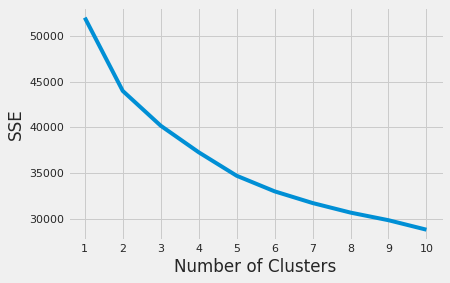

In [22]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
   kmeans = KMeans(n_clusters=k, random_state=0)
   kmeans.fit(X_sc)
   sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

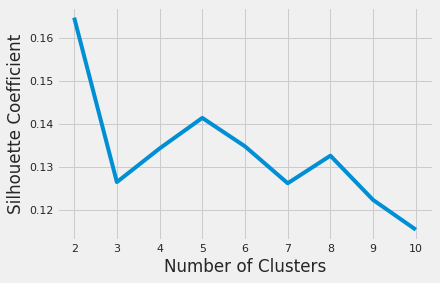

In [23]:
#A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 5 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_sc)
    score = silhouette_score(X_sc, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [24]:
# estimating silhouette score in clustering
silhouette_score(X_sc, labels)

0.14141242495809797

In [25]:
# Filter data
left_gym = data.groupby(['Churn']).mean()
left_gym

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [26]:
left_gym1 = data.groupby(['Churn']).sum()
left_gym1

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,1499,2566,1570,1039,2656,16891,1364,88101,465671.955802,15527.0,13848,5951.109513,5959.944414
1,542,815,377,195,958,1834,285,28636,122102.955435,1764.0,1051,1564.969337,1108.262875


In [27]:
left_gym2 = data.groupby(['Churn']).count()
left_gym2

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939
1,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061


In [28]:
# define the function for rendering graphs of paired features for the clusters
def show_clusters_on_plot(data, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(data[x_name], data[y_name],
           hue = data[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

data['cluster_km'] = labels
data.groupby(['cluster_km']).count()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,1011,1011,1011,1011,1011,1011,1011,1011,1011,1011,1011,1011,1011,1011
1,385,385,385,385,385,385,385,385,385,385,385,385,385,385
2,505,505,505,505,505,505,505,505,505,505,505,505,505,505
3,1262,1262,1262,1262,1262,1262,1262,1262,1262,1262,1262,1262,1262,1262
4,837,837,837,837,837,837,837,837,837,837,837,837,837,837


In [29]:
data.groupby(['cluster_km']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


**Highest correlated pair:**

- Contract_period & Month_to_end_contract and

- Avg_class_frequency_total & Avg_class_frequency_current_month

Others Notes:
- Cluster 2 and 4 are prone to leaving and 0 and 3 are loyal.
- Research on cluster 2 and 4 to find out why they are leaving and focus on improve service base on review

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


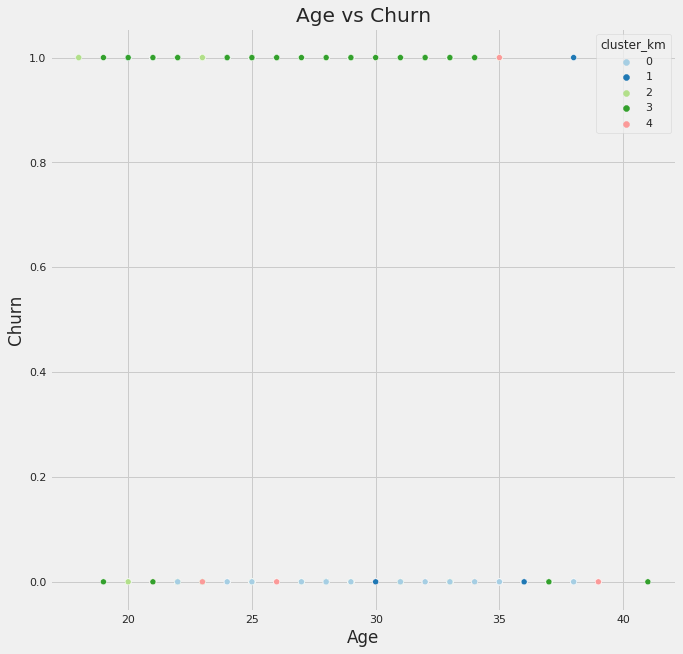

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


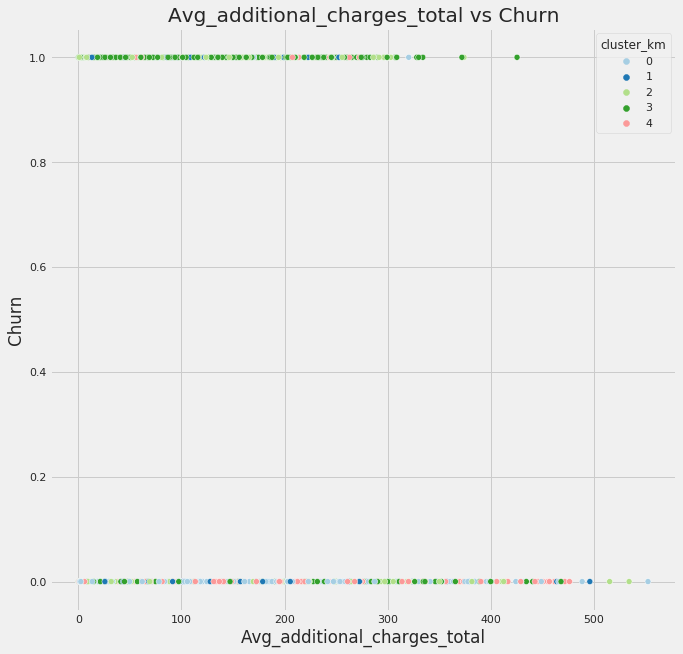

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


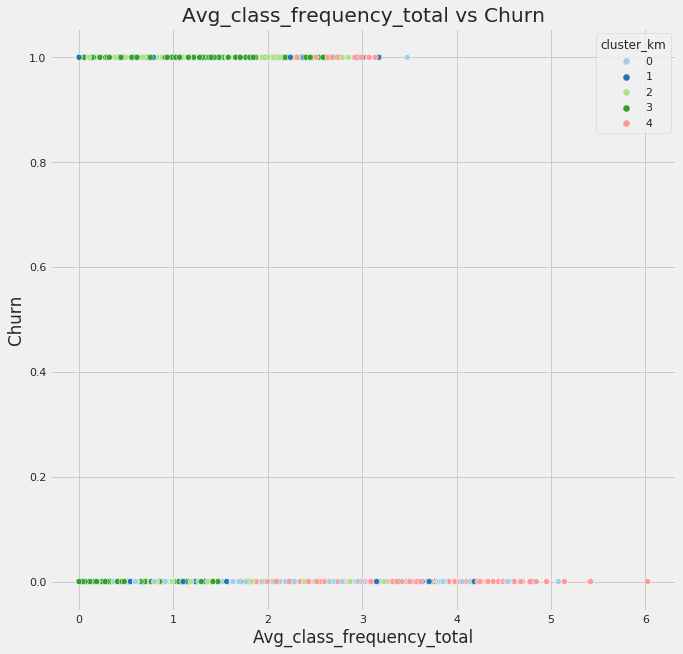

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


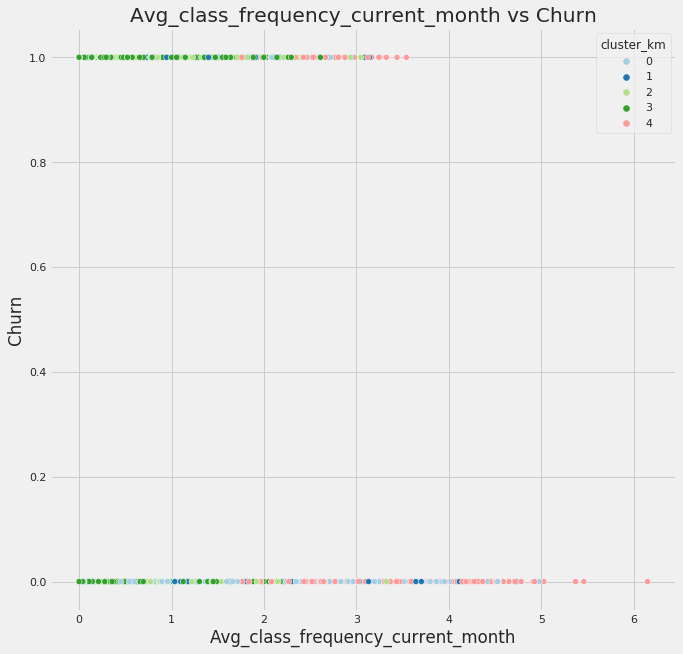

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


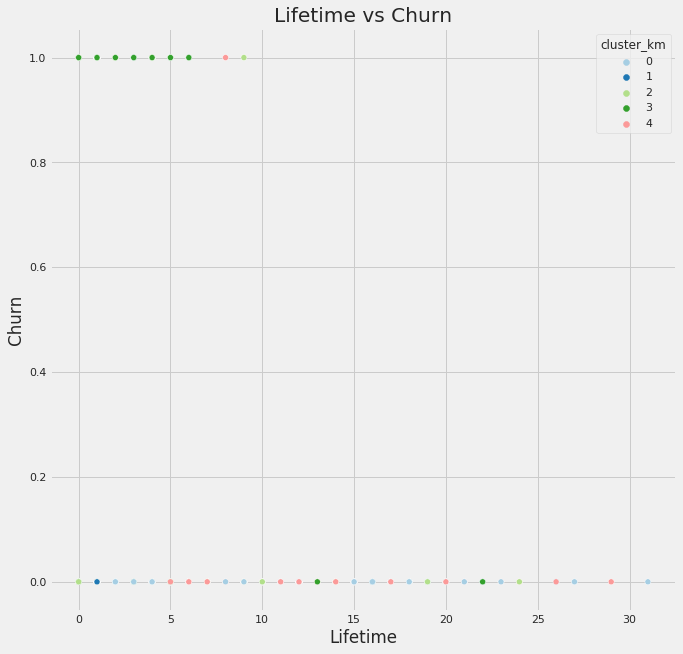

In [30]:
# render the graph for the paired churn to age
show_clusters_on_plot(data, 'Age', 'Churn', 'cluster_km')

# render the graph for the paired Churn to Additional Charges
show_clusters_on_plot(data, 'Avg_additional_charges_total', 'Churn', 'cluster_km')

# render the graph for the paired "Churn to Class frequency
show_clusters_on_plot(data, 'Avg_class_frequency_total', 'Churn', 'cluster_km')

# render the graph for the paired Churn to avg class frequency by month
show_clusters_on_plot(data, 'Avg_class_frequency_current_month', 'Churn', 'cluster_km')

# render the graph for the paired Churn to lifetime
show_clusters_on_plot(data, 'Lifetime', 'Churn', 'cluster_km')


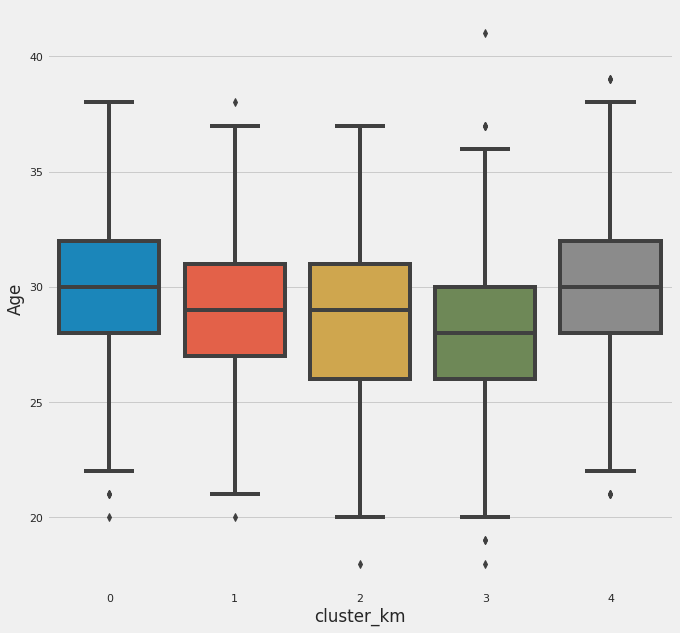

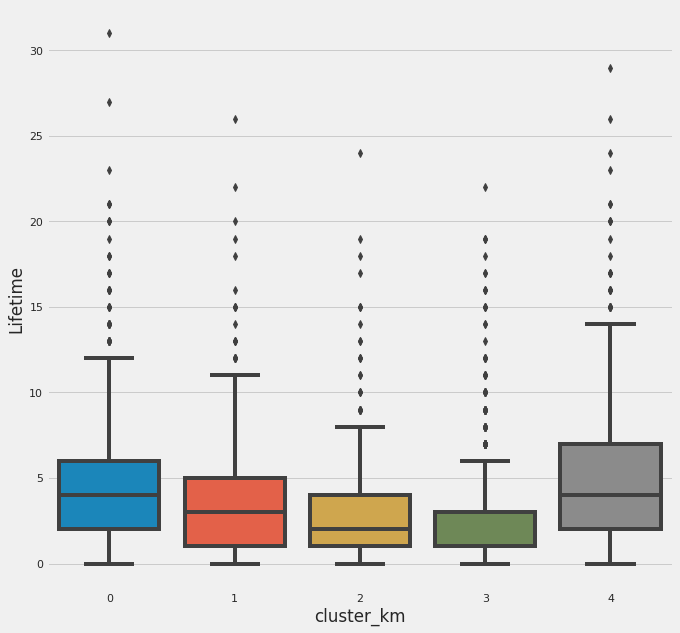

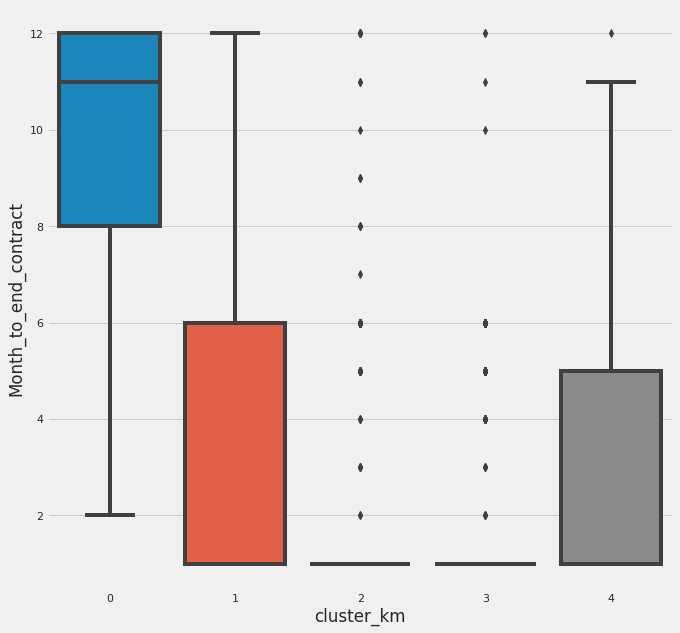

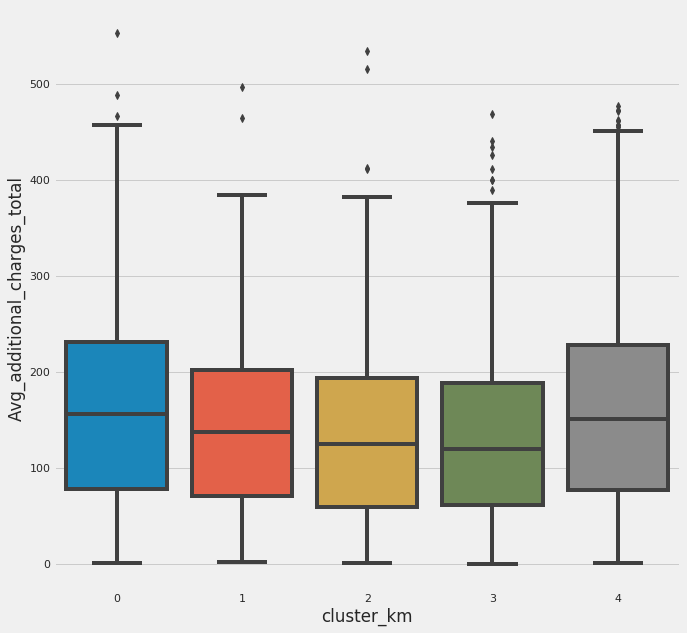

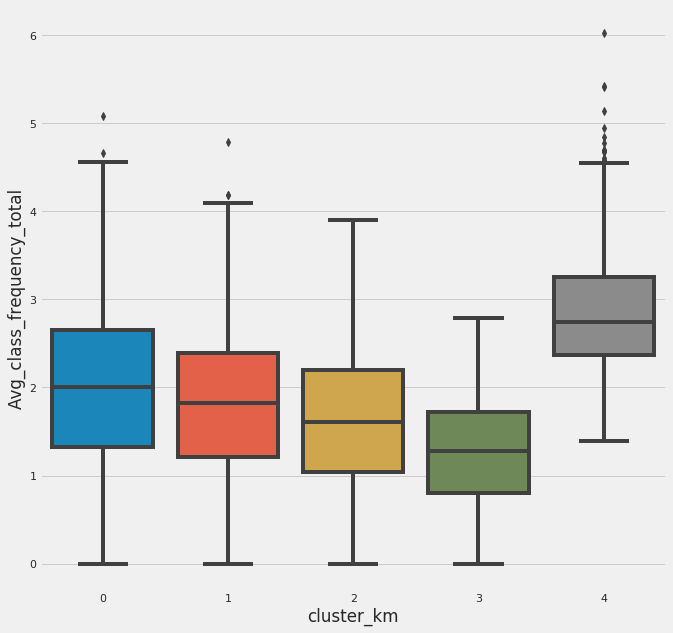

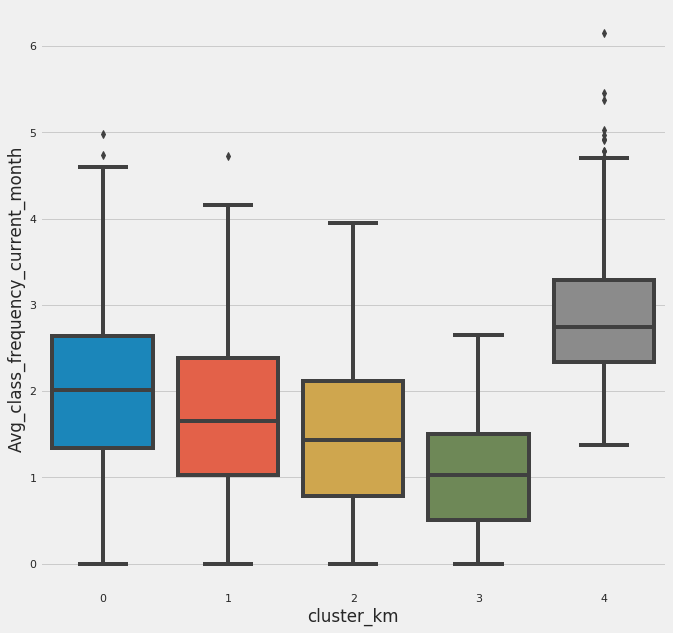

In [31]:
float_feature = ['Age', 'Lifetime', 'Month_to_end_contract', 'Avg_additional_charges_total', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month'] 

for feature in float_feature:
    plt.figure(figsize=(10,10))
    ax = sns.boxplot(data=data, x='cluster_km', y=feature)
    plt.show()

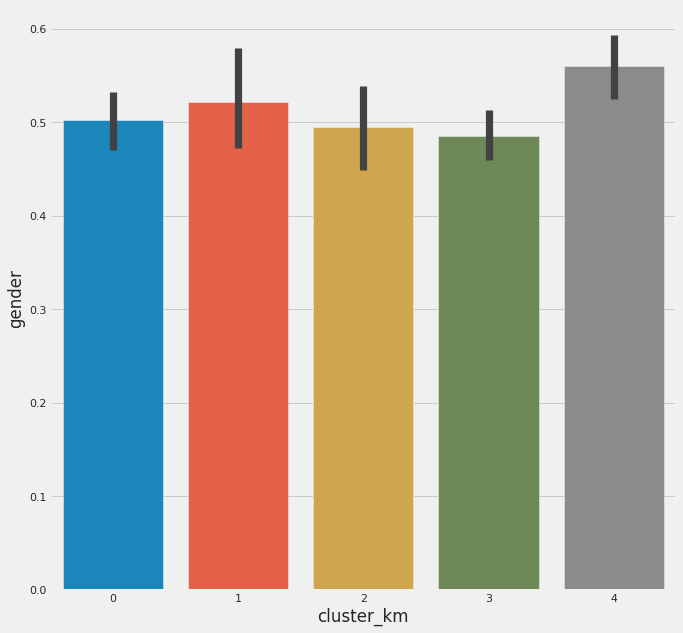

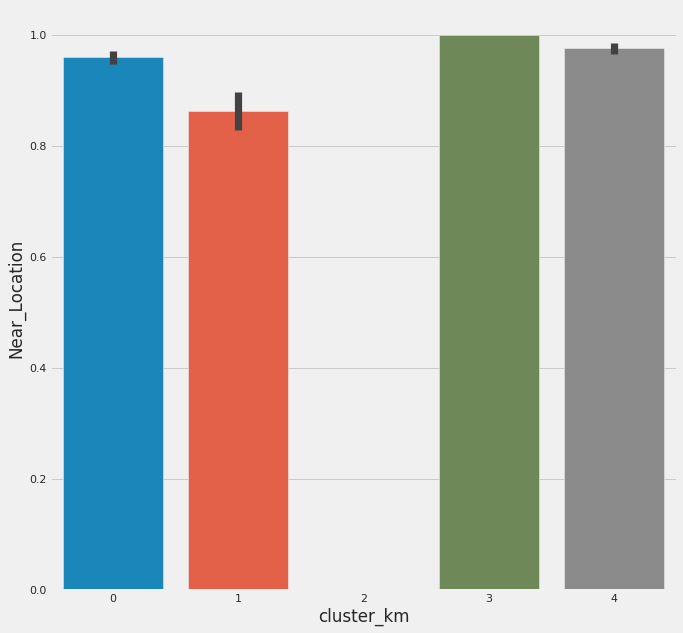

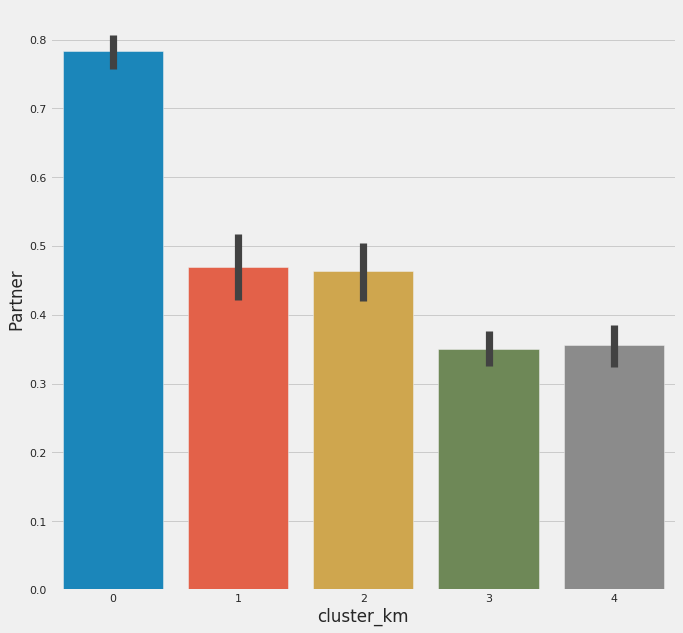

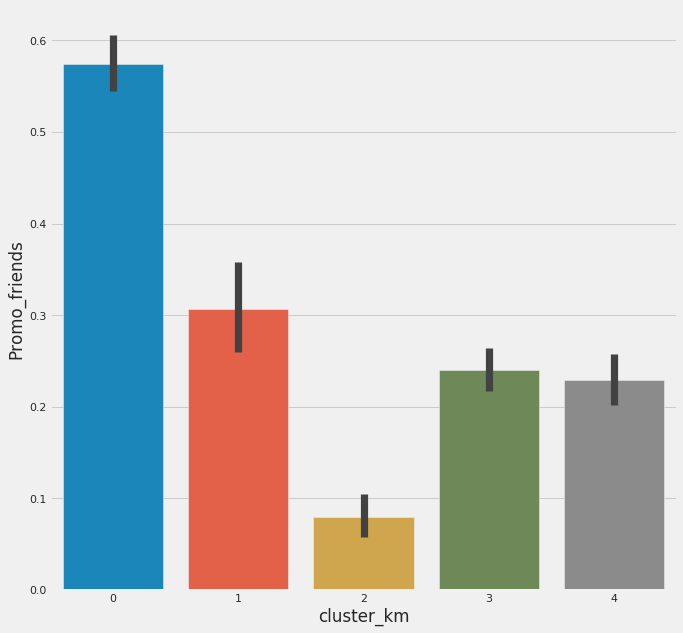

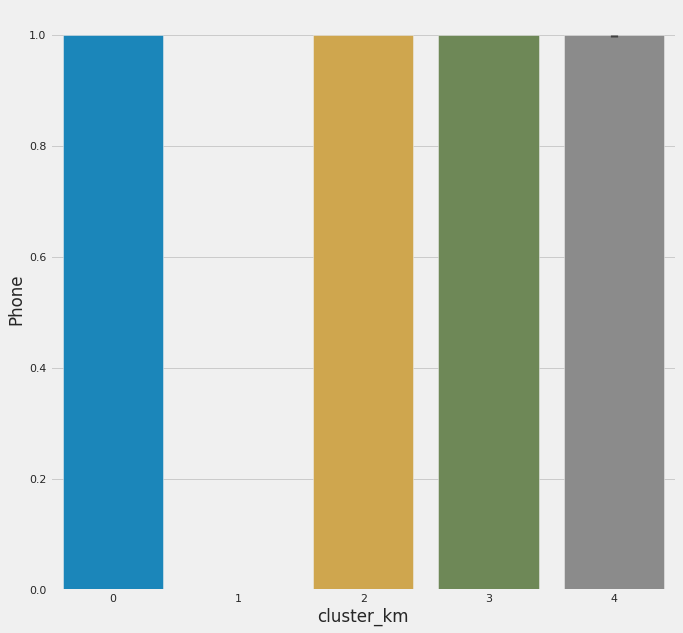

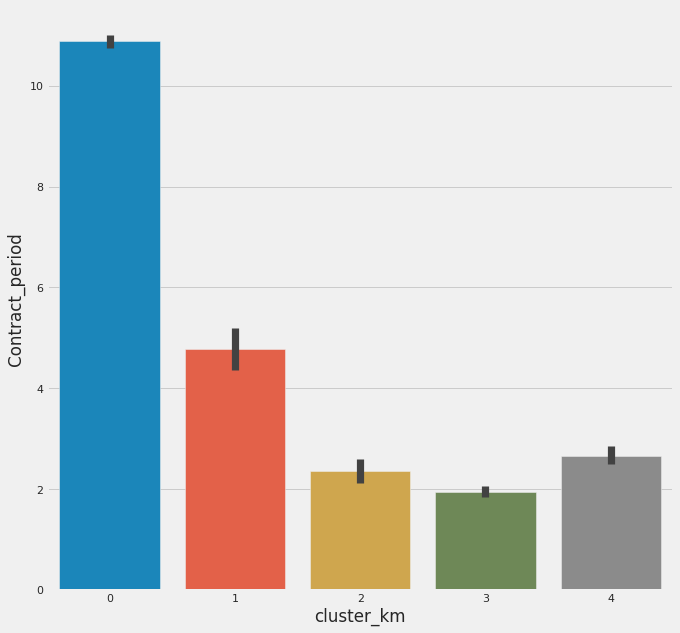

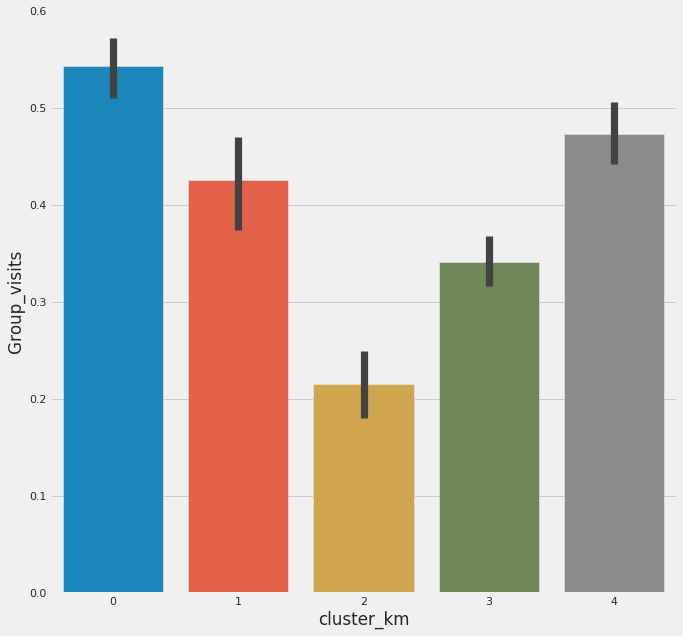

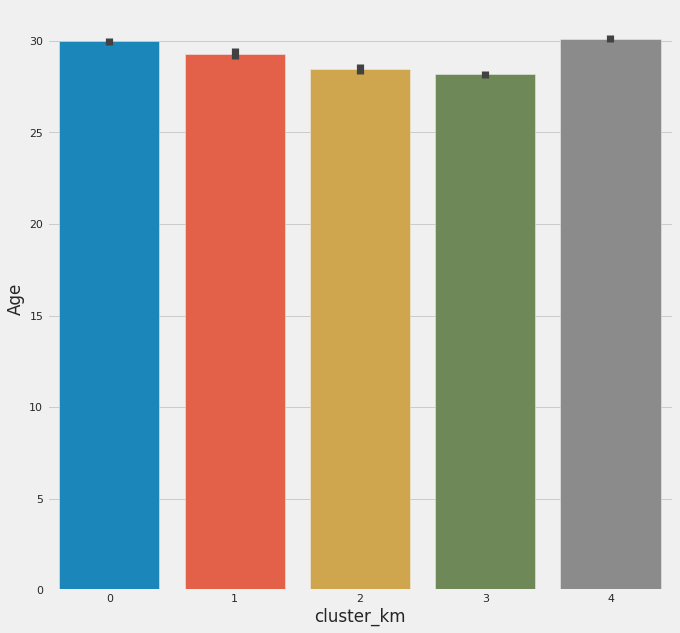

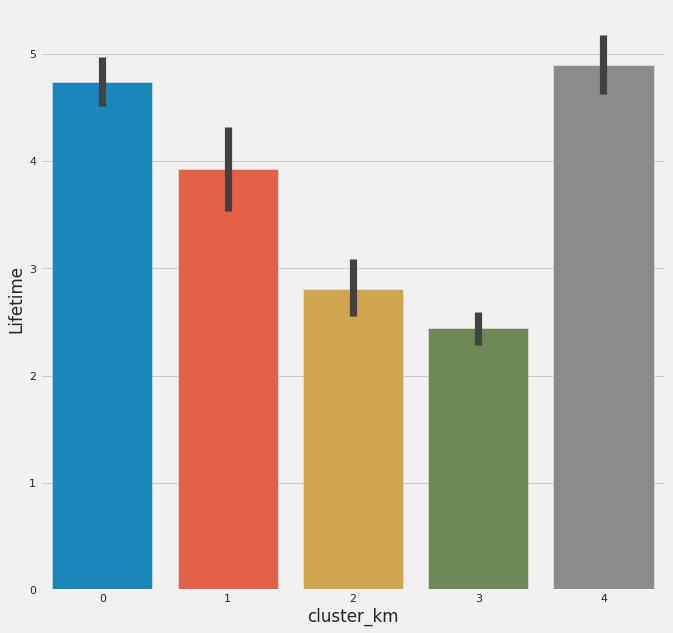

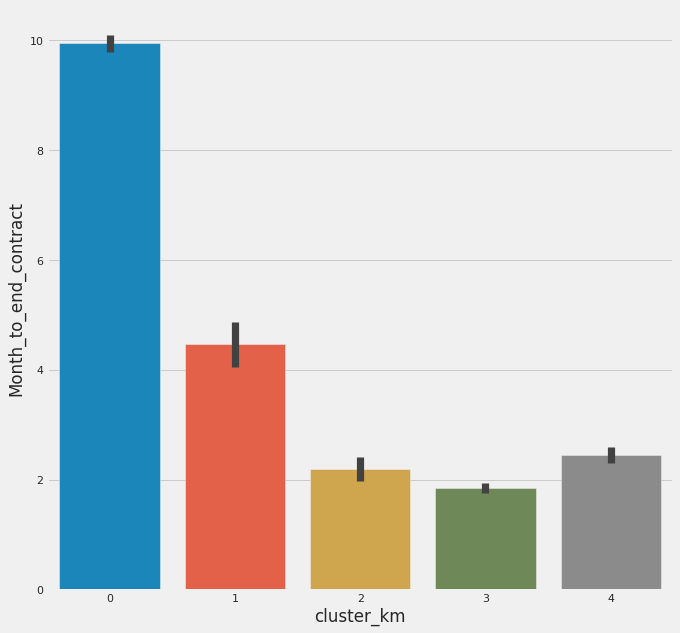

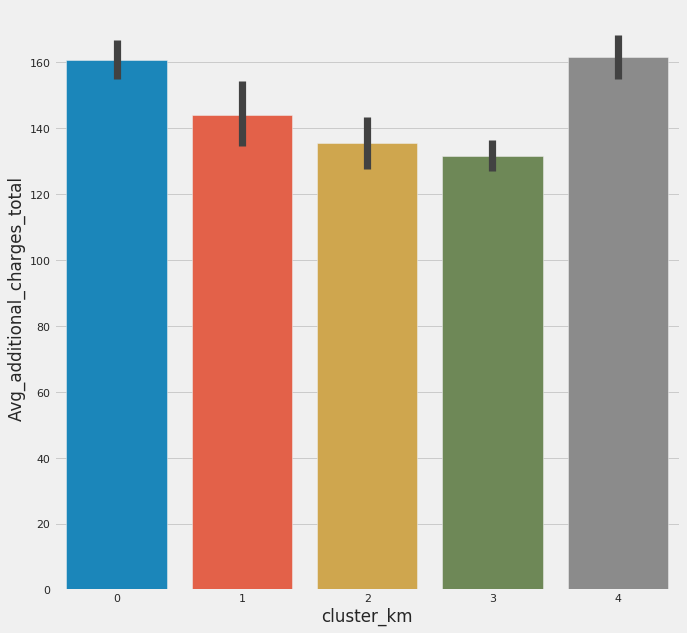

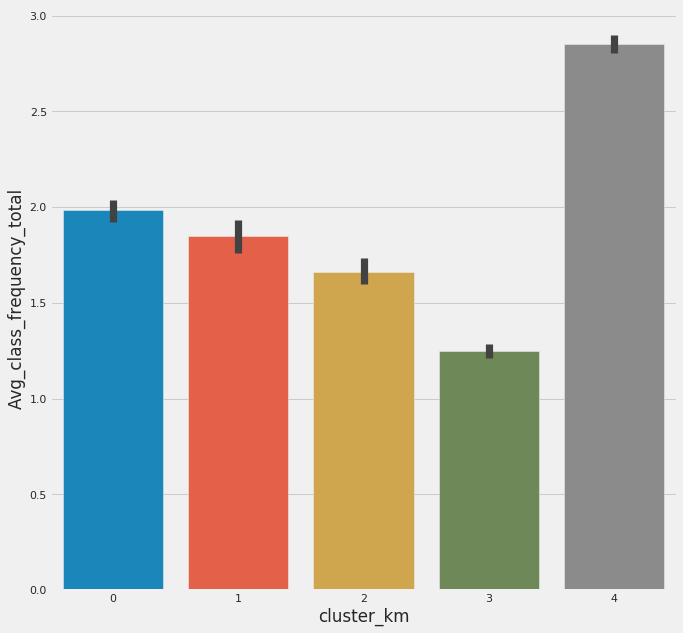

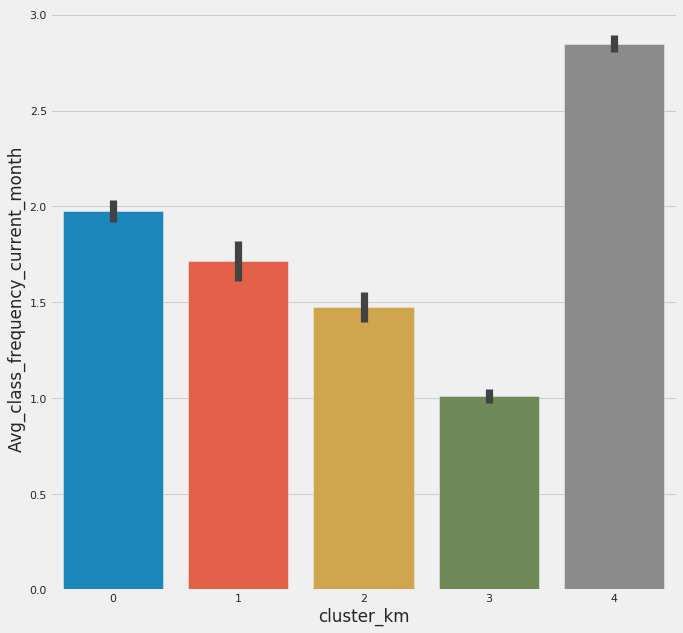

In [32]:
float_feature = ['gender','Near_Location','Partner','Promo_friends','Phone','Contract_period','Group_visits','Age', 'Lifetime', 'Month_to_end_contract', 'Avg_additional_charges_total', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month'] 

for feature in float_feature:
    plt.figure(figsize=(10,10))
    ax = sns.barplot(data=data, x='cluster_km', y=feature)
    plt.show()

from sklearn.metrics import classification_report
print(classification_report(labels))

<div class="alert alert-danger">
<h3>Reviewer's comment</h3>
    
Well done! But it is also necessary to depict the distributions of discrete variables. To do this, we should use barcharts.

<div class="alert alert-danger">
<h3>Reviewer's comment v2</h3>
    
These are still same variables. Gender,	Near_Location, Partner, Promo_friends and etc. are to be depicted :)

<div class="alert alert-info">
You'll see I've added all the variables/columns now

<div class="alert alert-success">
<h3>Reviewer's comment v3</h3>
    
Yeah, I see. Great job, looks very euthetic 👍🏻

<div class="alert alert-danger">
<h3>Reviewer's comment</h3>
    
Also could you please describe clusters profiles, highlight some similarities and differences.

<div class="alert alert-danger">
<h3>Reviewer's comment v2</h3>
    
What about other features?

<div class="alert alert-info">
    
I've described all of them below:
    
    
- Gender pretty similar cluster 2 highest
- near location cluster 4 highest otherwise similar
- partner highest cluster 3 and 4, 1 has none
- promotion highest cluster 4 and 3, 1 the lowest similar to partner
- phone all similar in clusters 1-4 must not of been used in cluster 0 at the beginning 
- contract period cluster 0 second highest, and then cluster 4 is the highest probably due to changes in the membership etc.
- group visits showing highest in cluster 4,3 and 0
- Age showing similar qualities
- Cluster 1 and 3 lowest in lifetime, 4 and 0 have highest month to end contract.
- Additional charges highest in cluster 2 and 4.
- Avg class freq. total and current month similar with 0 2 and 4 having most frequency.

<div class="alert alert-success">
<h3>Reviewer's comment v3</h3>
    
🔥🔥🔥
    
One more thing. Due to different packages version, clusters order may change. So, double check that conclusions match graphs in case you show this project to someone :)

### Step 5. Come up with conclusions and basic recommendations on working with customers
- Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.
- You don't need to go into detail. Three or four essential principles and examples of their implementation in the form of specific marketing steps will do.

### Conclusion



### **Customer Description**

- 51% male
- 84% live or work close by
- 49% is employee of partner company
- 90% use friend's promo code
- 90% provide phone number
- Average contract length is 4.6 months
- 41% take part in group session
- Average age is 29
- Average total frequency visit per week is 1.9
- Average current month frequency visist per week is 1.8
- Average money spent on gym service is 147
- Average lifetime is 3.7 months
- Average churn rate is 26%

### **Comparison of Non-Churn(0) vs Churn(1)**

- Non-Churn Customer is more likely to live or work closeby
- tends to be the partner
- use more friend's promo 
- has longer contract by 4 months 
- double group visits time 
- 3 years older as 29 vs 26 of churn group
- spent 43 more on service
- has 4 more months to end conract
- longer lifetime by almost 4 months
- visit gym by 25% more, and 50% more gym visit current month

### **Costumer Feature**
- Similar amount for both genders. 
- A lot more customers live or work near the gym. The gym attracts same number of partner and non-partner. 
- Joing through the friends promotion is twice as much as just joining by yourself. Most customers provide their phone number.
- 1 month contract is more than double of those 6 month and 1 year contracts.
- Group session is 2/3 of non-participating members.
- Most active consumers are aged 25-34.
- Additional charges are mostly within $0-$150.
- Most customers come to gym in 3 months.
- Average weekly visit frequency is 2 and so is the visit per week of the current month.
- The average amount of members leave because of the extra features they pay for. Another reason for leaving is because of age followed by the contract period. 


### **Customer Features Analysis 2 :**
- AGE: Shows biggest number of customers who leave are over 30. 
- AVG ADDIT. CHARGES- those who leave have more additional charges in total compared to those who stay.
- AVG CLASS FREQ.CURRENT MONTH- those who leave seem to use the gym more in frequency than those who stay in this category and the one below thats probably because some many of them take advantage of their contract until its up. 
- AVG CLASS FREQ TOTAL- shows similar tend as above.
- CONTRACT PERIOD - Most contracts are short for both churn and non-churn, however the churn group has a lot higher quanities of all, where as the non-churn group has suprisingly a lot of members who have really short contracts. The churn group most customers whos contracts are 2 months or almost 12 months.
- GROUP VISITS- similar trend here among non churn and churn groups.
- LIFETIME- lifetime is actually bigger as in more counts and more people the further and longer in months for those in churn group. lots more at the 5 month level than those who don't leave. 
- MO TO END CONTRACT-youll see this is similar to lifetime values as well like above the most in both categories are the ones under 2 months
- NEAR LOCATION- both groups have more people that live near the location
- PARTNER- more partner customers in churn group than non-churn group
- PHONE- similar in both groups
- PROMO FRIENDS- similar in both groups
- GENDER- similar

**Highest correlated pairs and cluster review:**

Pairs:
- Contract_period & Month_to_end_contract 
- Avg_class_frequency_total & Avg_class_frequency_current_month

### Cluster Review:
- Cluster 2 and 4 are prone to leaving and 0 and 3 are loyal.
- Research on cluster 2 and 4 to find out why they are leaving and focus on improve service base on review

### Cluster review 2:
- Gender pretty similar cluster 2 highest
- near location cluster 4 highest otherwise similar
- partner highest cluster 3 and 4, 1 has none
- promotion highest cluster 4 and 3, 1 the lowest similar to partner
- phone all similar in clusters 1-4 must not of been used in cluster 0 at the beginning 
- contract period cluster 0 second highest, and then cluster 4 is the highest probably due to changes in the membership etc.
- group visits showing highest in cluster 4,3 and 0
- Age showing similar qualities
- Cluster 1 and 3 lowest in lifetime, 4 and 0 have highest month to end contract.
- Additional charges highest in cluster 2 and 4.
- Avg class freq. total and current month similar with 0 2 and 4 having most frequency.

#### Recommendations:

The gym needs to incentivize customers to stay longer since the churn rate is high and many people dont have long gym contracts. Maybe have a plan where the customers have a deal to stay longer so for example the longer your contract the less expensive the membership. 

Also it wouldnt be a bad idea to maybe have different packages of memberships or sales where some memberships might include things like one massage per month or something that offers more than just the gym. I think its awesome that there are so many services offered so if more customers have access to it more people would use it and keep coming back. It could pay off to provide special sales and stuff to not only new customers but also long term customers or implement some kind of reward program. 

The gym should also look at promoting group sessions more since that helps connect people and encourage people to workout as it provides a sense of community.


<div style="border:solid black 2px; padding: 20px">
<h3>Checklist</h3> 
    
Let's make your project truly awesome and work a little bit more on the following issues:

1. **Plot bar histograms and feature distributions for those who left and those who stayed.**
2. **Correct models evaluation procedure.**
3. **Fix random_state_issue.**
4. **Plot bar histograms for discrete variables at the clustering stage.**
5. **Describe clusters profiles.**

Looking forward to seeing your perfect project next time! Feel free to ask whatever questions you have. Good luck 🙂
</div>

<div style="border:solid black 2px; padding: 20px">
<h3>Checklist v2</h3> 
    
We have several issues left:

1. **Plot bar histograms and feature distributions for those who left and those who stayed.**
2. **Plot bar histograms for discrete variables at the clustering stage.**
3. **Describe clusters profiles.**

Looking forward to seeing your project for the last check 🙂
</div>

<div class="alert alert-info">
Looks like i've met all of the requirements :)
thanks for providing good feedback i was originally pretty defeated when i got the first review back because the reviewer feedback varies so greatly. Me and my friend both turned in our projects and hers got approved and I got mine back with 5 fixes needed so I was kind of overwhelemed and we had the same data except i had the extra charts so mine was more thorough. Although it was nerve wracking I feel like mine definently shows more insight now compared to hers and I think its been helpful :)

<div style="border:solid green 2px; padding: 20px">

I didn't want to make you feel nervous or sad. My job is to give you as much feedback as I can :)
    
Try to avoid comparing your work to the work of others in this kind of way. Each of us has his or her own limits, abilities and perception of a good-quality job. So, by comparing our job to some less thorough but accepted work, we might miss some opportunities to improve 🙂